In [ ]:
# import python libraries
import pandas as pd
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**GATHERING DATA FROM DIFFERENT SOURCES**

In [ ]:
# load in twitter archive data
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [ ]:
# download image predictions data using url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)



In [ ]:
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)



In [ ]:
# load in image prediction data
img_prediction = pd.read_csv('image_predictions.tsv', sep='\t')   

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In the cell below is the code provided inthe classroom used to gather json data from Twitter Api.

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [ ]:
# open json txt file, read it line by line, extract the columns needed and create a dataframe
df_list = []
with open('tweet-json.txt','r')as file:
  for line in file:
    data = json.loads(line)
    tweet_id = data['id']
    favorite_count = data['favorite_count']
    retweet_count = data['retweet_count']

    df_list.append({'tweet_id':tweet_id,'favorite_count':favorite_count,'retweet_count':retweet_count})

json_data = pd.DataFrame(df_list,columns=['tweet_id','favorite_count','retweet_count'])

    

**DATA ASSESSMENT**

In [ ]:
# view twitter archive (top 5 entries)
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [ ]:
# view twitter archive bottom 5 entries
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [ ]:
# view image predictions table (top 5 entries)
img_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
# view image predictions table (buttom 5 entries)
img_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [ ]:
# view json data (top 5 entries)
json_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [ ]:
# view json data buttom 5 entries
json_data.tail()

,tweet_id,favorite_count,retweet_count
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48
2353,666020888022790149,2535,532


 **Visual assessment for Quality and Tidiness issues**

Twitter Archive Table
1. The following columns ; in_reply_to_status_id,in_reply_to_user_id column, retweeted_status_id,	retweeted_status_user_id,	retweeted_status_timestamp , have missing values.

2. The dog stages are in four different columns.

3. Source column contains url showing the device used to post the tweet.

Image Predictions Table
1. Entries in the prediction columns starts with lower case while some entries starts with upper case.
2. Non Descriptive column headers.
3. Prediction entries are in four different columns.

Json Data Table


**Programmatic assessment of each dataframe for Quality and Tidiness issues**

In [ ]:
# check for general properties 
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [ ]:
# check for nan values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

 This shows that 5 columns have missing enteries.

In [ ]:
# random sample of the data
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
497,813142292504645637,NaN,NaN,2016-12-25 22:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and look at t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813142292...,13,10,None,None,None,None,None
1831,676215927814406144,NaN,NaN,2015-12-14 01:43:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Herm. He just wants to be like the oth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676215927...,9,10,Herm,None,None,None,None
1223,714251586676113411,NaN,NaN,2016-03-28 00:43:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Thumas. He hates potted plants. 8/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714251586...,8,10,Thumas,None,None,None,None
515,811386762094317568,NaN,NaN,2016-12-21 01:44:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Craig. That's actually a normal sized ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811386762...,11,10,Craig,None,None,pupper,None
175,857989990357356544,NaN,NaN,2017-04-28 16:08:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rosie. She was just informed of the wa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857989990...,12,10,Rosie,None,None,None,None


In [ ]:
# check for duplicate enteries
twitter_archive.tweet_id.duplicated().sum()

0

There are no duplicate enteries.

In [ ]:
# summary statistics
twitter_archive.name.value_counts().sort_values(ascending=False)

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Pip             1
Scruffers       1
Cheryl          1
Alejandro       1
Christoper      1
Name: name, Length: 957, dtype: int64

In [ ]:
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [ ]:
# general properties of the dataframe
img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
# check for missing enteries
img_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

None of the columns in image prediction dataframe has null values.

In [ ]:
# random sample of the data
img_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
802,691459709405118465,https://pbs.twimg.com/media/CZiO7mWUEAAa4zo.jpg,1,Shetland_sheepdog,0.551206,True,collie,0.232544,True,Border_collie,0.095218,True
184,669354382627049472,https://pbs.twimg.com/media/CUoGQjdXAAAkaz2.jpg,1,Chihuahua,0.973990,True,French_bulldog,0.010832,True,Pekinese,0.002099,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
344,672267570918129665,https://pbs.twimg.com/media/CVRfyZxWUAAFIQR.jpg,1,Irish_terrier,0.716932,True,miniature_pinscher,0.051234,True,Airedale,0.044381,True
1928,858107933456039936,https://pbs.twimg.com/media/C-icm_WXUAAmuRR.jpg,1,golden_retriever,0.863874,True,Labrador_retriever,0.015920,True,doormat,0.010615,False


In [ ]:
# check for duplicated enteries
img_prediction.jpg_url.duplicated().sum()

66

There are 66 duplicated enteries.

In [ ]:
# heck for general properties
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [ ]:
# check for missing entries
json_data.isnull().sum()

tweet_id          0
favorite_count    0
retweet_count     0
dtype: int64

No missing values.

In [ ]:
# check for duplicated entries
json_data.duplicated().sum()

0

In [ ]:
# summary statistics
json_data.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


No duplicated enteries.

**Programmatic Assessment for Quality and Tidiness issues for each dataframe**

Twitter Archive:
1. There are missing enteries in name column represented as None.
2. Some entries in name column are a letter and not a name of a dog. Another inconsistency is that some names stats with upper case while others starts with lower case.
3. incorrecet datatype for timestamp. 

4. Information about dog tweet is spread across 3 tables.

Image Predictions
1. Duplicate jpg_url
2. Some dog breeds in columns p1,p2,p3 are written in lowercase while starts with upper case. 

           
     
   

        


**DATA CLEANING**

Make copies of each dataframe before cleaning.

In [ ]:
# make copies of the main dataframes before cleaning
twitter_dirty = twitter_archive.copy()
image_dirty = img_prediction.copy()
json_dirty = json_data.copy()


**Quality cleaning issue 1**

In order to meet the project requirement of working with only original tweets, only rows  where retweeted_status_id and in_reply_to_status_id isnull in twitter data will be selected.


In [ ]:
# select original tweets without retweets
twitter_dirty = twitter_dirty[twitter_dirty.retweeted_status_id.isnull()]
# select original tweets without replies
twitter_dirty = twitter_dirty[twitter_dirty.in_reply_to_status_id.isnull()]

In [ ]:
twitter_dirty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

**Quality cleaning issue 2**


**Define**

Drop columns that are not needed for analysis.

**Code**

In [ ]:
# Drop columns that have predominantely missing values
twitter_dirty.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1,inplace=True)


**Test**

In [ ]:
# Test for changes
twitter_dirty.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

 **Quality cleaning issue 3**


**Define**

Change datatype of timestamp column in twitter_dirty from object (str) to datetime.

**Code**

In [ ]:
# change datatype of timestamp column in twitter data
twitter_dirty.timestamp = pd.to_datetime(twitter_dirty.timestamp)


**Test**

In [ ]:
# Test changes
twitter_dirty.timestamp.dtype

datetime64[ns, UTC]

 **Quality issue cleaning 4**


**Define**

Extract device used to post tweet from Source column in Twitter Archive data. Extract the strings after rel="nofollow"> and before < in the url using regular expression.

**Code**

In [ ]:
# Extract device used to post tweet
twitter_dirty.source = twitter_dirty.source.str.extract(r'rel="nofollow">(.*)<')

# Test for changes
twitter_dirty.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

**Test**

In [ ]:
# Test for changes
twitter_dirty.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

**Quality cleaning issue 5**


**Define**

Replace the None entries in name column of twitter data with Nan. None is not a dog's name. This [link text](https://stackoverflow.com/questions/23307301/replacing-column-values-in-a-pandas-dataframe) was used as guide.

In [ ]:
# unique values in name column
twitter_dirty.name.value_counts()

None          603
a              55
Lucy           11
Charlie        11
Oliver         10
             ... 
Lenox           1
Harvey          1
Blanket         1
Burt            1
Christoper      1
Name: name, Length: 955, dtype: int64

**Code**


In [ ]:
# replace none values in name column with nan
twitter_dirty.name.replace(['None'], ['Nan'], inplace = True)

**Test**


In [ ]:
#Test changes in name column
twitter_dirty.name.value_counts()

Nan           603
a              55
Lucy           11
Charlie        11
Oliver         10
             ... 
Lenox           1
Harvey          1
Blanket         1
Burt            1
Christoper      1
Name: name, Length: 955, dtype: int64

**Quality cleaning issue 6**


**Define**

Extract weekday, month and year columns each tweet was posted from timestamp column.Drop timestamp column after.

**Code**

In [ ]:
# extract weekday and create column
twitter_dirty['weekday'] = twitter_dirty['timestamp'].dt.weekday

# extarct month and create column
twitter_dirty['month'] = twitter_dirty['timestamp'].dt.month

# extract year and create column
twitter_dirty['year'] = twitter_dirty['timestamp'].dt.year

# drop timestamp column
twitter_dirty.drop('timestamp',axis=1,inplace=True)





**Test**

In [ ]:
#Test that timestamp column has been dropped
twitter_dirty.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'weekday', 'month', 'year'],
      dtype='object')

In [ ]:
#Test enteries in weekday column
twitter_dirty.weekday.unique()

array([1, 0, 6, 5, 4, 3, 2])

In [ ]:
# Test enteries in month column
twitter_dirty.month.unique()

array([ 8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10,  9])

In [ ]:
#Test enteries in year column
twitter_dirty.year.unique()

array([2017, 2016, 2015])

**Quality cleaning issue 7**



**Define**

Drop duplicated enteries in jpg_url column in image predictions data.

**Code**

In [ ]:
# drop duplicate enteries
image_dirty.drop_duplicates(subset=['jpg_url'],inplace=True)

**Test**

In [ ]:
# Test changes
image_dirty.jpg_url.duplicated().sum()

0

**Quality cleaning issue 8**


**Define**

Rename columns in image predictions that are not descriptive.

**Code**

In [ ]:
image_dirty.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [ ]:
# Rename columns
image_dirty.rename(columns={'p1':'breed1','p1_conf':'breed1_conf','p1_dog':'breed1_dog','p2':'breed2','p2_conf':'breed2_conf','p2_dog':'breed2_dog','p3':'breed3','p3_conf':'breed3_conf','p3_dog':'breed3_dog'},inplace=True)



**Test**

In [ ]:
#Test changes
image_dirty.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'breed1', 'breed1_conf', 'breed1_dog',
       'breed2', 'breed2_conf', 'breed2_dog', 'breed3', 'breed3_conf',
       'breed3_dog'],
      dtype='object')

**Quality cleaning issue 9**


**Define**

Change inconsistent column enteries to lower case. I used this [link text](https://stackoverflow.com/questions/22245171/how-to-lowercase-a-pandas-dataframe-string-column-if-it-has-missing-values) as a guide.

**Code**

In [ ]:
# change column entries to lower case
image_dirty = image_dirty.applymap(lambda s:s.capitalize() if type(s) == str else s)

**Test**

In [ ]:
# print entries in 1 column to Test changes
image_dirty.breed2.unique()

array(['Collie', 'Miniature_pinscher', 'Malinois', 'Redbone',
       'Rottweiler', 'English_springer', 'Mud_turtle', 'Tibetan_mastiff',
       'Shopping_basket', 'Komondor', 'Yorkshire_terrier',
       'English_foxhound', 'Bull_mastiff', 'German_shepherd', 'Shih-tzu',
       'Newfoundland', 'Cock', 'Desk', 'Toy_terrier', 'Toy_poodle',
       'Otter', 'Chesapeake_bay_retriever', 'Siberian_husky', 'Skunk',
       'Afghan_hound', 'Bloodhound', 'Barracouta', 'Papillon',
       'Cocker_spaniel', 'Chow', 'Irish_terrier', 'Chain_saw', 'Beagle',
       'Giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'Slug', 'Brittany_spaniel', 'Standard_schnauzer',
       'Teddy', 'Armadillo', 'African_hunting_dog', 'Vizsla', 'Doormat',
       'Pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'Miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'Swab',
       'Malamute', 'Bath_towel', 'Border_collie', 'Leonberg', 'Drake',
       'French_bulldog', 'Ice_bear', 

**Quality cleaning issue 10**

**Define**

Replace entries that starts with lower case letters with Nan in  name column (twitter archive).

**Code**

In [ ]:
# check rows where name starts with lower case
lower_df = twitter_dirty.loc[(twitter_dirty['name'].str.islower())]
lower_df.name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [ ]:
# replace names starting with lower case with Nan
twitter_dirty.name = twitter_dirty.name.mask(twitter_dirty.name.str.islower().fillna(False))

**Test**

In [ ]:
# check for entries where dog name starts with an
twitter_dirty.loc[twitter_dirty['name'] == 'an']

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,weekday,month,year


**Test**

**Tidiness cleaning issue 1**


**Define**

The dog stages are split into 4 columns, put them together into 1 column so there will be just 1 column for dog stages.

**Code**

In [ ]:
# merge four dog stages into a single  column dog_stage
twitter_dirty['dog_stage'] = twitter_dirty[['puppo', 'pupper', 'floofer', 'doggo']].apply(
    lambda x: ','.join(x.astype(str)),axis=1)
twitter_dirty['dog_stage'] = twitter_dirty['dog_stage'].str.replace(r'(None,)', repl='')
twitter_dirty.drop(['puppo','pupper','floofer','doggo'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


**Test**

In [ ]:
# Test that dog stage columns have been merged into 1 and dropped
twitter_dirty.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'weekday', 'month', 'year', 'dog_stage'],
      dtype='object')

In [ ]:
# view newly created dog stage column
twitter_dirty.dog_stage.value_counts()

None             1761
pupper,None       221
doggo              72
puppo,None         23
floofer,None        9
pupper,doggo        9
puppo,doggo         1
floofer,doggo       1
Name: dog_stage, dtype: int64

**Tidiness cleaning issue 2**


**Define**

Merge the 3 dataframes , to have one master dataframe.

**Code**

In [ ]:
# merge the three dataframes together
twitter_dirty = pd.merge(left=twitter_dirty, right=json_dirty, left_on='tweet_id', right_on='tweet_id', how='inner')
twitter_dirty = twitter_dirty.merge(image_dirty, on='tweet_id', how='inner')


**Test**

In [ ]:
# Test for changes
twitter_dirty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   source              1971 non-null   object 
 2   text                1971 non-null   object 
 3   expanded_urls       1971 non-null   object 
 4   rating_numerator    1971 non-null   int64  
 5   rating_denominator  1971 non-null   int64  
 6   name                1873 non-null   object 
 7   weekday             1971 non-null   int64  
 8   month               1971 non-null   int64  
 9   year                1971 non-null   int64  
 10  dog_stage           1971 non-null   object 
 11  favorite_count      1971 non-null   int64  
 12  retweet_count       1971 non-null   int64  
 13  jpg_url             1971 non-null   object 
 14  img_num             1971 non-null   int64  
 15  breed1              1971 non-null   object 
 16  breed1

> Save the merged dataframe to csv.

In [ ]:
# save dataframe to master csv file
twitter_dirty.to_csv('twitter_archive_master.csv')

**Analyzing and Visualizing Data**

In [ ]:
# load in twitter archive master dataset
twitter_archive = pd.read_csv('twitter_archive_master.csv',index_col=0)

In [ ]:
# check general properties of the data
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   source              1971 non-null   object 
 2   text                1971 non-null   object 
 3   expanded_urls       1971 non-null   object 
 4   rating_numerator    1971 non-null   int64  
 5   rating_denominator  1971 non-null   int64  
 6   name                1873 non-null   object 
 7   weekday             1971 non-null   int64  
 8   month               1971 non-null   int64  
 9   year                1971 non-null   int64  
 10  dog_stage           1971 non-null   object 
 11  favorite_count      1971 non-null   int64  
 12  retweet_count       1971 non-null   int64  
 13  jpg_url             1971 non-null   object 
 14  img_num             1971 non-null   int64  
 15  breed1              1971 non-null   object 
 16  breed1

In [ ]:
# check dimension of the dataframe
twitter_archive.shape

(1971, 24)

**Question 1**

What is the most frequently used device used for posting tweet?

In [ ]:
#check if there are missing values in source column
twitter_archive.source.isnull().sum()

0

In [ ]:
# check for the most used device
twitter_archive.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

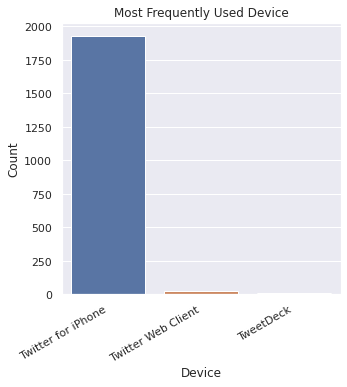

In [ ]:
# visualize frequently used device 
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='source',data=twitter_archive)
plt.xlabel('Device')
plt.ylabel('Count')
plt.title('Most Frequently Used Device')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.savefig('device.png')
plt.show()

This analysis shows that tweets are posted from three sources namely; Twitter for iPhone,Twitter Web Client and TweetDeck. Out of the three sources , most tweets are posted from iPhone.



**Question 2**

What month are most tweet posted?

In [ ]:
# check for month with highest tweet
twitter_archive.month.value_counts().sort_values(ascending=False)


12    414
11    347
1     232
2     172
3     165
7     137
6     123
5      98
4      94
10     65
9      63
8      61
Name: month, dtype: int64

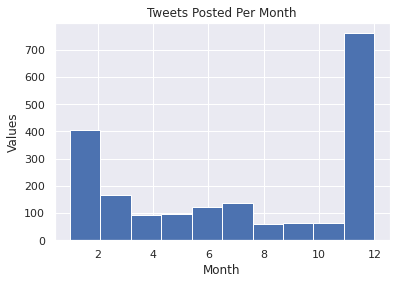

In [ ]:
# visualize tweet posted per month
twitter_archive.month.hist()
plt.xlabel('Month')
plt.ylabel('Values')
plt.savefig('month.png')
plt.title('Tweets Posted Per Month')
plt.show()

 This analysis shows that most tweets were posted in December which is the 12th month.

**Question 3**

How many image predictions are not dogs if all three breed predictions are False and how many are dogs if all three breed predictions are true?

In [ ]:
#get subset of dataframe for predictions that are dogs
not_dog = twitter_archive.loc[twitter_archive['breed1_dog']== False]
not_dog = twitter_archive.loc[twitter_archive['breed2_dog']== False]
not_dog = twitter_archive.loc[twitter_archive['breed3_dog']== False]

In [ ]:
# random sample of entries that are not dogs
not_dog.sample(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,weekday,month,year,...,img_num,breed1,breed1_conf,breed1_dog,breed2,breed2_conf,breed2_dog,breed3,breed3_conf,breed3_dog
1355,680798457301471234,Twitter for iPhone,Say hello to Moofasa. He must be a powerful do...,https://twitter.com/dog_rates/status/680798457...,6,10,Moofasa,5,12,2015,...,1,Ram,0.499761,False,Hog,0.283795,False,Ox,0.067455,False
1465,676263575653122048,Twitter for iPhone,All this pupper wanted to do was go skiing. No...,https://twitter.com/dog_rates/status/676263575...,10,10,Nan,0,12,2015,...,1,Teddy,0.098283,False,Toy_poodle,0.098029,True,Shopping_basket,0.077852,False
1265,685663452032069632,Twitter for iPhone,Meet Brooks. He's confused by the almighty bal...,https://twitter.com/dog_rates/status/685663452...,12,10,Brooks,5,1,2016,...,1,Chesapeake_bay_retriever,0.171174,True,Tennis_ball,0.090644,False,Racket,0.048508,False
1297,683849932751646720,Twitter for iPhone,This is Jiminy. He's not the brightest dog. Ne...,https://twitter.com/dog_rates/status/683849932...,5,10,Jiminy,0,1,2016,...,1,Hog,0.458855,False,Mexican_hairless,0.164906,True,Wild_boar,0.111700,False
1260,686003207160610816,Twitter for iPhone,This is Hammond. He's a peculiar pup. Loves lo...,https://twitter.com/dog_rates/status/686003207...,3,10,Hammond,6,1,2016,...,1,Damselfly,0.190786,False,Common_newt,0.098131,False,Whiptail,0.088958,False


In [ ]:
# how many entries are not dogs
not_dog.shape[0]

540

In [ ]:
# get subset of dataframe for predictions that are dogs
are_dog = twitter_archive.loc[twitter_archive['breed1_dog']== True]
are_dog = twitter_archive.loc[twitter_archive['breed2_dog']== True]
are_dog = twitter_archive.loc[twitter_archive['breed3_dog']== True]

In [ ]:
# random sample of breeds that are dogs
are_dog.sample(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,weekday,month,year,...,img_num,breed1,breed1_conf,breed1_dog,breed2,breed2_conf,breed2_dog,breed3,breed3_conf,breed3_dog
810,738166403467907072,Twitter for iPhone,This is Axel. He's a professional leaf catcher...,https://twitter.com/dog_rates/status/738166403...,12,10,Axel,3,6,2016,...,2,Keeshond,0.878886,True,Norwegian_elkhound,0.086659,True,Malamute,0.021280,True
1667,671528761649688577,Twitter for iPhone,Meet Jax. He's in the middle of a serious conv...,https://twitter.com/dog_rates/status/671528761...,10,10,Jax,1,12,2015,...,1,Doberman,0.782626,True,Black-and-tan_coonhound,0.109678,True,Gordon_setter,0.052110,True
1067,701601587219795968,Twitter for iPhone,This is Coopson. He's a Blingin Schnitzel. Bui...,https://twitter.com/dog_rates/status/701601587...,10,10,Coopson,0,2,2016,...,1,Chihuahua,0.993661,True,Pembroke,0.001505,True,Toy_terrier,0.000867,True
413,802952499103731712,Twitter for iPhone,This is Marley. She's having a ruff day. Prett...,https://twitter.com/dog_rates/status/802952499...,12,10,Marley,6,11,2016,...,1,Chow,0.944032,True,Golden_retriever,0.017240,True,Pomeranian,0.012085,True
1791,669328503091937280,Twitter for iPhone,This is Kirk. He just saw a bacon wrapped tenn...,https://twitter.com/dog_rates/status/669328503...,12,10,Kirk,2,11,2015,...,1,Siberian_husky,0.424202,True,Eskimo_dog,0.237660,True,Malamute,0.052572,True


In [ ]:
# how many entries are dogs
are_dog.shape[0]

1431

This analysis shows that according to image predictions, 540 images tweeted are not dogs while 1431 images are dogs.

**Question 4?**

What is the most popular dog stage?

In [ ]:
# check most popular dog stage
twitter_archive.dog_stage.value_counts()

None             1668
pupper,None       201
doggo              63
puppo,None         22
pupper,doggo        8
floofer,None        7
puppo,doggo         1
floofer,doggo       1
Name: dog_stage, dtype: int64

Analysis shows that most of the dog names are missing,and there are dogs that are classified into multiple dog stages.